# Best Neighborhoods to Rob in Pittsburgh
### According to Educational and Income Data
#### _by Alejandro Ciuba_ from Team "Thievery Trio"

In [1]:
#Importing the libraries to use for the data analysis
import pandas as pd
import numpy as np
import matplotlib

# Introduction 

For my part of the project, I will be analyzing which neighborhoods would be the best to rob according to an educational/income dataset provided by [The WPRDC](http://www.wprdc.org). First, I will analyze the educational/income dataset to determine which neighborhoods in Pittsburgh are the _"most eduacated"_ as those neighborhoods could host valuables such as expensive research equipment, data, and research papers which could all sell well on the black market. Next, I will be analyzing which neighborhoods are the _"richest"_, since that demographic of people would be perfect to mug.

## Education/Income Dataset

The dataset, [_"Education-Income 2010"_](https://data.wprdc.org/dataset/pgh/resource/f7b19c6c-aa66-419b-b0e1-9998d7ddfcbc), provides us several important pieces of data for each neighborhood: average education obtained, average income, and the estimated percentage of the neighborhood under the poverty line. All of these will provide useful information from which we can draw conclusions about which neighborhoods are the best to rob depending on what a thief wants.

In [2]:
#Import the dataset from the link
edu_inc = pd.read_csv("education-income.csv")

#Read the beginning of the dataset
edu_inc.head(10)

,Neighborhood,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
0,Allegheny Center,3,933,609,18.7%,44.5%,17.2%,15.8%,3.8%,"$16,964","$20,911","$22,535","$22,793",954,324,34.0%
1,Allegheny West,3,462,239,9.2%,28.9%,6.7%,44.8%,10.5%,"$26,638","$41,761","$35,386","$45,519",239,12,5.0%
2,Allentown,6,"2,500","1,729",23.0%,63.3%,6.6%,5.6%,1.5%,"$22,539","$29,274","$29,941","$31,909","2,212",630,28.5%
3,Arlington,7,"1,869","1,232",14.9%,65.3%,10.1%,7.1%,2.5%,"$27,167","$25,119","$36,089","$27,380","1,779",361,20.3%
4,Arlington Heights,7,244,166,18.1%,74.1%,0.0%,7.8%,0.0%,"$18,646","$9,417","$24,769","$10,265",293,169,57.7%
5,Banksville,5,"4,144","3,935",9.8%,51.5%,9.8%,22.3%,6.6%,"$38,555","$50,625","$51,217","$55,181","4,170",243,5.8%
6,Bedford Dwellings,15,"1,202",733,8.3%,49.9%,12.8%,14.2%,14.7%,"$8,955","$9,992","$11,896","$10,891","1,203",589,49.0%
7,Beechview,5,"7,974","5,211",11.0%,58.1%,11.1%,13.6%,6.2%,"$34,079","$36,602","$45,270","$39,896","7,450","1,366",18.3%
8,Beltzhoover,6,"1,925","1,369",19.3%,54.3%,13.8%,8.3%,4.2%,"$26,750","$33,869","$35,535","$36,917","2,066",485,23.5%
9,Bloomfield,12,"8,442","6,671",11.2%,42.6%,8.6%,24.1%,13.5%,"$23,831","$30,830","$31,658","$33,604","9,192","1,781",19.4%


Here is just a preview of the dataset, there will be a focus on the most recent batch of data for the _"Edu. Attainment"_ and _"Median Income"_ categories. First, the data will be grouped by education obtained for each type of education.

Text(0, 0.5, 'Percentage of Pop.')

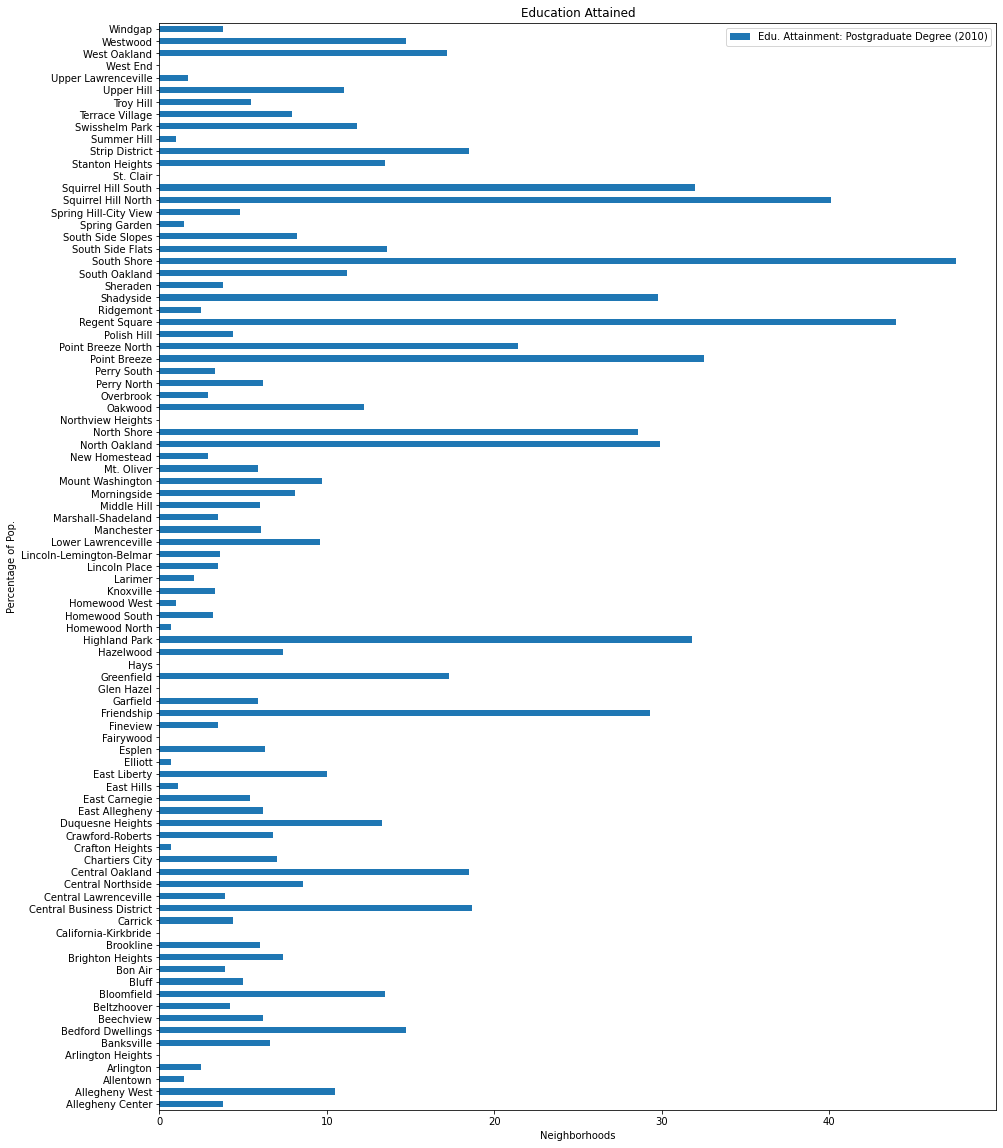

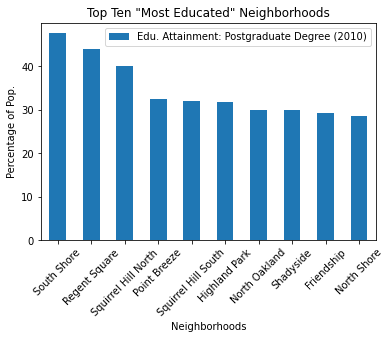

In [9]:
edu_pos = edu_inc.loc[:,["Neighborhood", "Edu. Attainment: Postgraduate Degree (2010)"]]

#Drop NaN values, and reindex
edu_pos = edu_pos.dropna()
edu_pos.reset_index(drop=True, inplace=True)

#Convert % strings to numerical data
for x in range(len(edu_pos)):
    #change that value to a float
    edu_pos.loc[x, "Edu. Attainment: Postgraduate Degree (2010)"] = float(edu_pos.loc[x, "Edu. Attainment: Postgraduate Degree (2010)"].split("%")[0])
    
#Create a bar graph for all neighborhoods
graph_1 = edu_pos.plot.barh(x="Neighborhood", y="Edu. Attainment: Postgraduate Degree (2010)", title="Education Attained", figsize=[15, 20])
graph_1.set_xlabel("Neighborhoods")
graph_1.set_ylabel("Percentage of Pop.")

#Create a top ten bar graph
#Sort the data and get the top ten "Most Educated" neighborhoods
edu_pos = edu_pos.sort_values(by="Edu. Attainment: Postgraduate Degree (2010)", ascending=False)
edu_pos_topten = edu_pos.head(10)

#Create the graph
graph_2 = edu_pos_topten.plot(kind="bar", title="Top Ten \"Most Educated\" Neighborhoods", x="Neighborhood", rot=45)
graph_2.set_xlabel("Neighborhoods")
graph_2.set_ylabel("Percentage of Pop.")

Here is a ranking of postgraduate eduction obtained for each neighborhood, it displays what percentage of each neighborhood has obtained a PhD/Master's Degree in some field. Ignoring security factors and basing our observations solely on valuables to rob, it makes the most sense to attack the neighborhoods featured in the top ten graph as they could have the most in items such as expensive research paper, valuable data, and expensive researching equipment. All of which could garner hefty prices on some black market.

Now, the goal is to compare the top ten richest neighborhoods in Pittsburgh and the list of top ten "most educated" neighborhoods to see if there is a set of neighborhoods that meets both criteria.

Text(0, 0.5, 'Income')

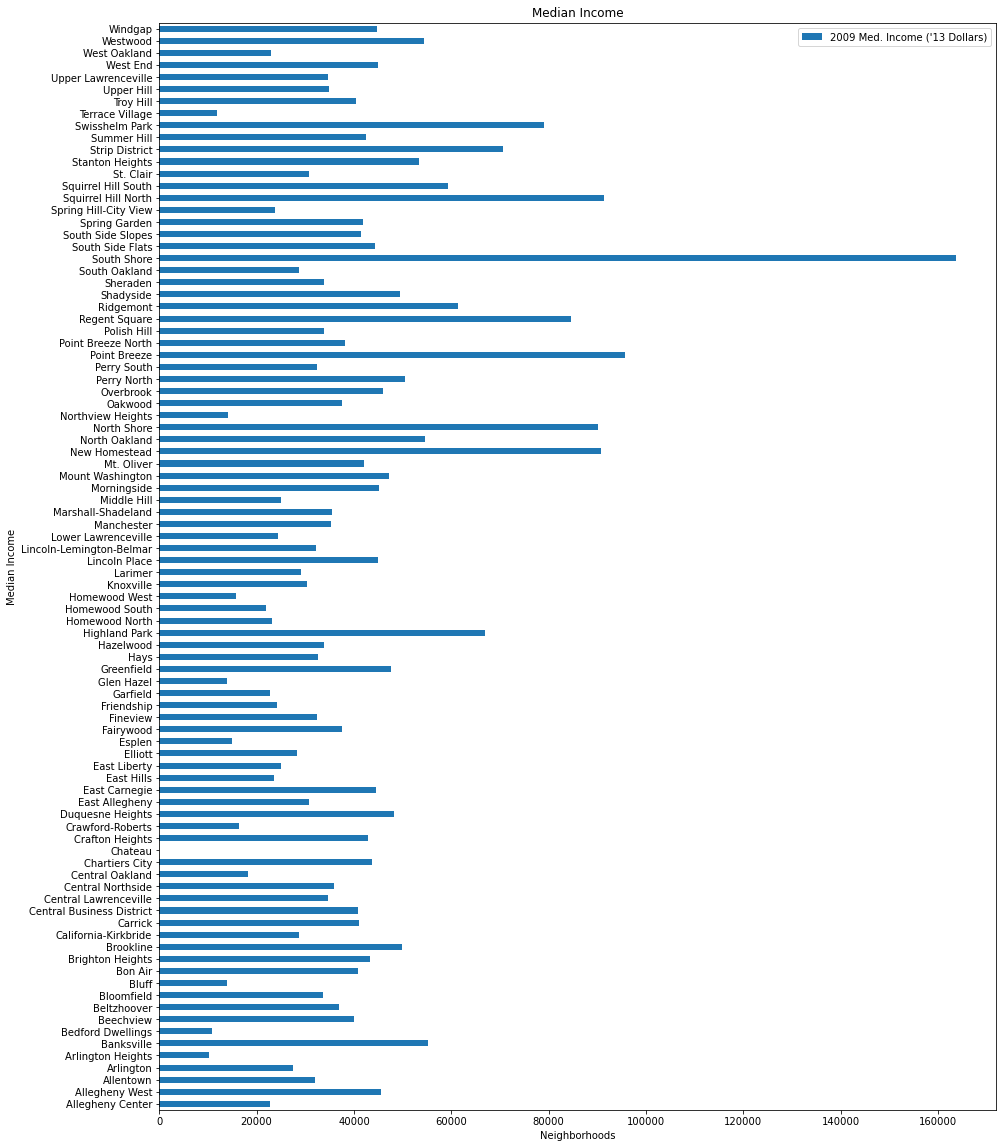

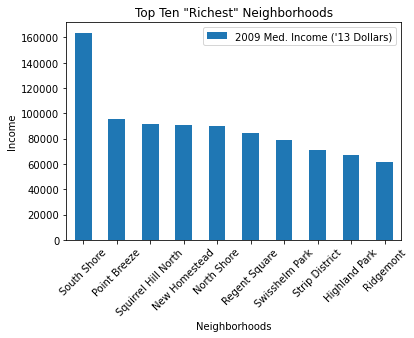

In [11]:
edu_money = edu_inc.loc[:,["Neighborhood", "2009 Med. Income ('13 Dollars)"]]

#Drop NaN values, and reindex
edu_money = edu_money.dropna()
edu_money.reset_index(drop=True, inplace=True)

#Convert % strings to numerical data
for x in range(len(edu_money)):

    #change that value to a float
    edu_money.loc[x, "2009 Med. Income ('13 Dollars)"] = float(edu_money.loc[x, "2009 Med. Income ('13 Dollars)"].rstrip().replace(",", "").split("$")[1])

#Create a bar graph for all neighborhoods
graph_3 = edu_money.plot.barh(x="Neighborhood", y="2009 Med. Income ('13 Dollars)", title="Median Income", figsize=[15, 20])
graph_3.set_xlabel("Neighborhoods")
graph_3.set_ylabel("Median Income")

#Create a top ten bar graph
#Sort the data and get the top ten "Richest" neighborhoods
edu_money = edu_money.sort_values(by="2009 Med. Income ('13 Dollars)", ascending=False)
edu_money_topten = edu_money.head(10)

#Create the graph
graph_4 = edu_money_topten.plot(kind="bar", title="Top Ten \"Richest\" Neighborhoods", x="Neighborhood", rot=45)
graph_4.set_xlabel("Neighborhoods")
graph_4.set_ylabel("Income")

Here is a comprehensive graph showing the median income for all the Pittsburgh neighborhoods. It would make the most sense to focus on the neighborhoods that appear in the top ten bar graphs as they have the most income; thus, the most money for things like muggings and robberies.

Now let's see which neighborhoods are in both lists.

In [8]:
#Neigborhoods only that were in both lists
#Print out a nice table
print("======= The Most Educated and Richest Neighborhoods =======")

for x in edu_pos_topten.loc[:, "Neighborhood"]:
    for y in edu_money_topten.loc[:, "Neighborhood"]:
        if x == y:
            print(x)

======= The Most Educated and Richest Neighborhoods =======
South Shore
Regent Square
Squirrel Hill North
Point Breeze
Highland Park
North Shore


Finally, we have a list of the neighborhoods that could provide us not only quick monetary gain, but also could give us valuable items to steal.

## Conclusion

We can conclude that, purely from a monetary and item perspective (ignoring things like security, policing, etc.), these 6 neighborhoods are the best place to scope out for potential robbery targets. While any of these neighborhoods that appeared on either list would be suitable enough targets, it would depend on the type of robbery and what the thief would hope to get out of the robbery. If the thief wants potentially valuable technical items: research papers, research equipment, important datasets; then, it would make sense to focus mostly on the neighborhoods with the most postgraduate citizens. If the thief wants to simply make a quick buck from the robbery, they should focus on the list of richest neighborhoods. In any case, after deciding which of the three lists they should focus on, they would then consider other factors not stated in the list: security, policing, street lights, etc. 